# Basic preprocessing of the corpus

In this Notebook, we will some basic preprocessing of the corpus. This is necessary to analyze and visualize the corpus in the upcoming Notebooks in this tutorial.

## Run notebook 02

We need this so that we can use the variables from that notebook. You can ignore the outputs from these cells.

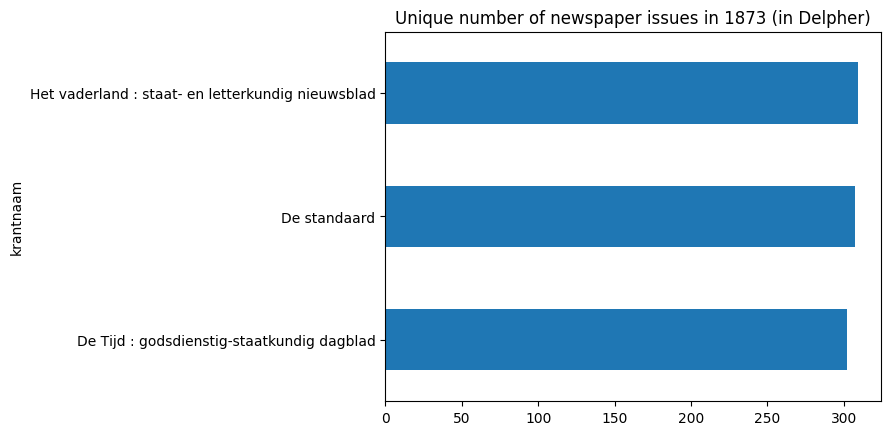

In [1]:
%run 02_Loading_data_and_visualizing_corpus.ipynb 

### Check if DataFrame is stored correctly

Let's quickly check if the DataFrame is stored correctly. We do this by displaying the first 5 rows of the DataFrame. 

In [2]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day
13792,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,RIVIKR-VA.A.B-',1873-01-01,"&M.STERDAM 31 December, ü ding n_ar: Tot Mannh...",De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday
13747,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,?sfde van den feestdag:,1873-01-01,?sfde van den feestdag: 'ESIIIJI.EIIIS O. 11.»...,De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday
13748,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,"'^ERDAIVI, 31 December.",1873-01-01,NaN,De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday
6969,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,WATERHOOGTE.,1873-01-01,"M<i.bh'i;n,27l>cc. 10 »:. 0 dm. Gtv. 4 dm. CoU...",De standaard,Landelijk,January,Wednesday
6968,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,KOERS VAN ANTWERPEN 30 Dec. 1872.,1873-01-01,Amiterdam ztgt £r. 210.05 Geld. fr. 210 30 pap...,De standaard,Landelijk,January,Wednesday


Looks good! Now we can move on to the actual preprocessing steps.

## Load NLP model

[SpaCy](https://spacy.io/) offers language models which you can import and use to perform natural language processing. We load the library and the appropriate Dutch model for our corpus.

In [3]:
import spacy
from spacy.lang.nl.examples import sentences

Load the Dutch natural language processing (NLP) package.

In [4]:
nlp = spacy.load("nl_core_news_sm")

## Create Doc items

Create a helper function. We will use this in the next step.

In [5]:
def process_text(text):
    return nlp(text)

Create a new column in the pandas DataFrame, called "doc". This column stores the content of each article in a way that is easy to use in later steps of this tutorial. In order to make the Doc items, we first need to get rid of the rows in the dataframe that do not contain any content of the article. This is represented by a 'NaN' in the 'content' column. We can use the 'dropna' function to get rid of the NaN values. 




In [9]:
data = data.dropna(subset=['content'])

> Note that running the next cell takes approximately 15 minutes.

In [10]:
data["doc"] = data["content"].apply(process_text)

In [11]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day,doc
13792,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,RIVIKR-VA.A.B-',1873-01-01,"&M.STERDAM 31 December, ü ding n_ar: Tot Mannh...",De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday,"(&, M.STERDAM, 31, December, ,, ü, ding, n_ar,..."
13747,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,?sfde van den feestdag:,1873-01-01,?sfde van den feestdag: 'ESIIIJI.EIIIS O. 11.»...,De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday,"(?, sfde, van, den, feestdag, :, ', ESIIIJI.EI..."
6969,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,WATERHOOGTE.,1873-01-01,"M<i.bh'i;n,27l>cc. 10 »:. 0 dm. Gtv. 4 dm. CoU...",De standaard,Landelijk,January,Wednesday,"(M, <, i.bh'i;n,27l, >, cc, ., 10, », :, ., 0,..."
6968,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,KOERS VAN ANTWERPEN 30 Dec. 1872.,1873-01-01,Amiterdam ztgt £r. 210.05 Geld. fr. 210 30 pap...,De standaard,Landelijk,January,Wednesday,"(Amiterdam, ztgt, £, r., 210.05, Geld, ., fr.,..."
6967,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,Koers van het geld bij de Ned. Bank sedert 12 ...,1873-01-01,Wissel-DUcuulo S jiCt.; Promeneu-DijconU 51') ...,De standaard,Landelijk,January,Wednesday,"(Wissel-DUcuulo, S, jiCt, ., ;, Promeneu-Dijco..."


## Tokenization

Tokenization refers to the process of breaking down a piece of text into small units, called 'tokens'. In our case, the tokens are the words in an article, but tokens can also consist of parts of words or characters. Tokenization is a crucial part of NLP.

Create a helper function. We will use this in the next step.

In [12]:
def get_token(doc):
    return [(token.text) for token in doc]

Create a "Token" column in the DataFrame. This column stores the words in each article as a list, which is useful in later steps.

In [13]:
data['tokens'] = data['doc'].apply(get_token)

In [14]:
data.head()

,identifier,oaiIdentifier,type,title,date,content,krantnaam,verspreidingsgebied,month,day,doc,tokens
13792,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,RIVIKR-VA.A.B-',1873-01-01,"&M.STERDAM 31 December, ü ding n_ar: Tot Mannh...",De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday,"(&, M.STERDAM, 31, December, ,, ü, ding, n_ar,...","[&, M.STERDAM, 31, December, ,, ü, ding, n_ar,..."
13747,http://resolver.kb.nl/resolve?urn=ddd:01026234...,DDD:ddd:010262344:mpeg21,artikel,?sfde van den feestdag:,1873-01-01,?sfde van den feestdag: 'ESIIIJI.EIIIS O. 11.»...,De Tĳd : godsdienstig-staatkundig dagblad,Landelijk,January,Wednesday,"(?, sfde, van, den, feestdag, :, ', ESIIIJI.EI...","[?, sfde, van, den, feestdag, :, ', ESIIIJI.EI..."
6969,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,WATERHOOGTE.,1873-01-01,"M<i.bh'i;n,27l>cc. 10 »:. 0 dm. Gtv. 4 dm. CoU...",De standaard,Landelijk,January,Wednesday,"(M, <, i.bh'i;n,27l, >, cc, ., 10, », :, ., 0,...","[M, <, i.bh'i;n,27l, >, cc, ., 10, », :, ., 0,..."
6968,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,KOERS VAN ANTWERPEN 30 Dec. 1872.,1873-01-01,Amiterdam ztgt £r. 210.05 Geld. fr. 210 30 pap...,De standaard,Landelijk,January,Wednesday,"(Amiterdam, ztgt, £, r., 210.05, Geld, ., fr.,...","[Amiterdam, ztgt, £, r., 210.05, Geld, ., fr.,..."
6967,http://resolver.kb.nl/resolve?urn=ddd:01106545...,DDD:ddd:011065450:mpeg21,artikel,Koers van het geld bij de Ned. Bank sedert 12 ...,1873-01-01,Wissel-DUcuulo S jiCt.; Promeneu-DijconU 51') ...,De standaard,Landelijk,January,Wednesday,"(Wissel-DUcuulo, S, jiCt, ., ;, Promeneu-Dijco...","[Wissel-DUcuulo, S, jiCt, ., ;, Promeneu-Dijco..."


## Lemmatization

Lemmatization is the process of reducing words to their most basic form, known as the lemma. For example, the lemma of 'running' is 'run' and the lemma of 'better' is 'good'. Lemmatization is important for NLP, because it reduces the complexity of a text, improves accuracy of many NLP tasks, and leads to better semantic understanding. 

Create a helper function. We will use this function in the next step.

In [15]:
def get_lemma(doc):
    return [(token.lemma_) for token in doc]

Create 'lemma' column in the DataFrame.

In [16]:
data['lemmas'] = data['doc'].apply(get_lemma)

Display lemmas and tokens.

In [17]:
data[['tokens', 'lemmas']].head()

,tokens,lemmas
13792,"[&, M.STERDAM, 31, December, ,, ü, ding, n_ar,...","[&, M.STERDAM, 31, December, ,, ü, ding, n_ar,..."
13747,"[?, sfde, van, den, feestdag, :, ', ESIIIJI.EI...","[?, sfde, van, den, feestdag, :, ', ESIIIJI.EI..."
6969,"[M, <, i.bh'i;n,27l, >, cc, ., 10, », :, ., 0,...","[m, <, i.bh'i;n,27l, >, cc, ., 10, », :, ., 0,..."
6968,"[Amiterdam, ztgt, £, r., 210.05, Geld, ., fr.,...","[Amiterdam, ztgt, £, r., 210.05, Geld, ., fr.,..."
6967,"[Wissel-DUcuulo, S, jiCt, ., ;, Promeneu-Dijco...","[Wissel-DUcuulo, S, JiCt, ., ;, Promeneu-Dijco..."


Comparing the tokens with the lemmas, we can see how some words have been reduced to their root form. For example, 'viel' has been changed to 'vallen'. However, we can also see that 'tweeden' has been changed to 'tweed'. This change is more questionable. 

## Count number of words in each article

In the next code block, we will count the number of words in each article and store it in a separate column, called 'article_length'. We will use this information to make a comparison between the different newspapers in the next Notebook. 

In [18]:
## Retrieve the length of each article in the corpus and store it in the DataFrame

## Create empty list to store the lengths
article_lengths = []

## Retrieve length of each article and store in list
for index, row in data.iterrows():
    article_lengths.append(len(row['tokens']))

## Append list to DataFrame
data['article_length'] = article_lengths

## Show the first rows of title, tokens and article length in DataFrame                                    
data[['title', 'tokens', 'article_length']].head()

,title,tokens,article_length
13792,RIVIKR-VA.A.B-',"[&, M.STERDAM, 31, December, ,, ü, ding, n_ar,...",41
13747,?sfde van den feestdag:,"[?, sfde, van, den, feestdag, :, ', ESIIIJI.EI...",18
6969,WATERHOOGTE.,"[M, <, i.bh'i;n,27l, >, cc, ., 10, », :, ., 0,...",74
6968,KOERS VAN ANTWERPEN 30 Dec. 1872.,"[Amiterdam, ztgt, £, r., 210.05, Geld, ., fr.,...",21
6967,Koers van het geld bij de Ned. Bank sedert 12 ...,"[Wissel-DUcuulo, S, jiCt, ., ;, Promeneu-Dijco...",34


## Write new dataset into separate file

In [19]:
data.to_csv('data_preprocessed.csv', index=False)

We now have a created a new file, called 'data_preprocessed.csv'. We will use this in the next Notebooks.